In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import random
%config InlineBackend.figure_format='retina'


In [2]:
# ##########   PART 1

In [3]:
'''
Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
survival: Survival (0 = No; 1 = Yes)
name: Name
sex: Sex
age: Age
sibsp: Number of Siblings/Spouses Aboard
parch: Number of Parents/Children Aboard
ticket: Ticket Number
fare: Passenger Fare (British pound)
cabin: Cabin
embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat: Lifeboat
body: Body Identification Number
home.dest: Home/Destination
'''

df = pd.read_excel('titanic.xls')

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df['survived'].mean()


0.3819709702062643

In [6]:
df.groupby(['pclass','sex']).mean()


survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

In [7]:
class_sex_grouping = df.groupby(['pclass','sex']).mean()
print(class_sex_grouping)

               survived        age     sibsp     parch        fare        body
pclass sex                                                                    
1      female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
2      female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
3      female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167


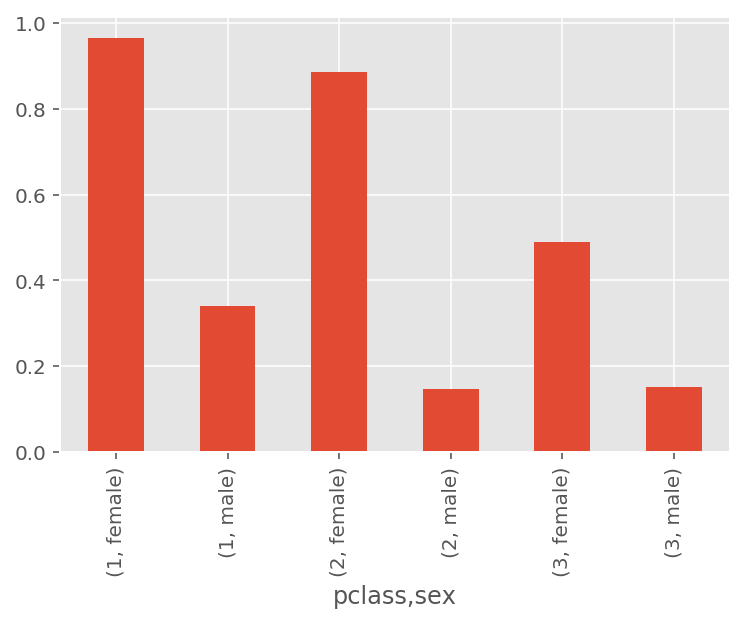

In [8]:
class_sex_grouping['survived'].plot.bar()
plt.show()

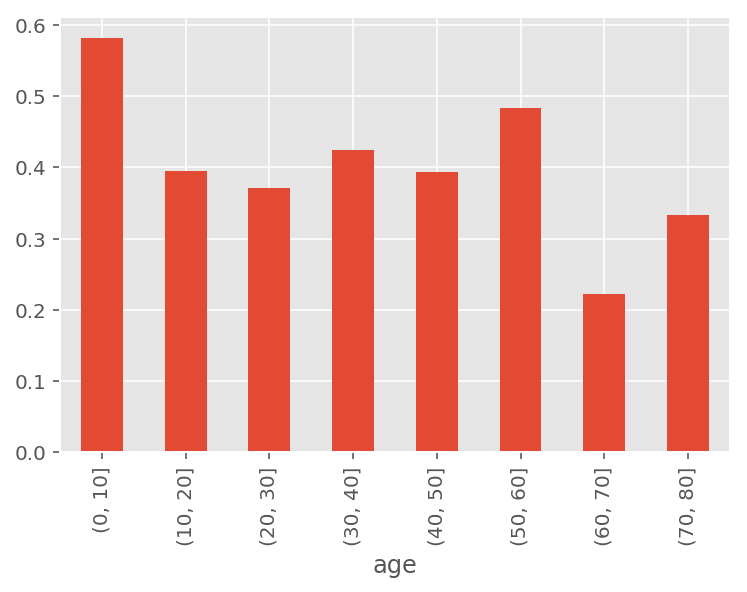

In [9]:
group_by_age = pd.cut(df["age"], np.arange(0, 90, 10))
age_grouping = df.groupby(group_by_age).mean()
age_grouping['survived'].plot.bar()
plt.show()

In [10]:
df.drop(['body','name'], 1, inplace=True)
df.fillna(0, inplace=True)
df.head()


,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"


In [11]:
def handle_non_numerical_data(df):
    columns = df.columns.values

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)

In [12]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,1,0,29.0000,0,0,758,211.3375,84,1,1,103
1,1,1,1,0.9167,1,2,520,151.5500,119,1,12,138
2,1,0,0,2.0000,1,2,520,151.5500,119,1,0,138
3,1,0,1,30.0000,1,2,520,151.5500,119,1,0,138
4,1,0,0,25.0000,1,2,520,151.5500,119,1,0,138


In [13]:
X = np.array(df.drop(['survived'], 1).astype(float))
Y = np.array(df['survived'])

clf = KMeans(n_clusters=2)
clf.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
clf.cluster_centers_

array([[2.36068111e+00, 6.54798762e-01, 2.39205367e+01, 5.20123839e-01,
        4.10216718e-01, 2.29306502e+02, 3.17286441e+01, 1.71269350e+01,
        1.41331269e+00, 5.48142415e+00, 1.03273994e+02],
       [2.23076923e+00, 6.33484163e-01, 2.38355958e+01, 4.78129713e-01,
        3.60482655e-01, 7.01372549e+02, 3.47719198e+01, 2.44419306e+01,
        1.37254902e+00, 5.47058824e+00, 1.14497738e+02]])

In [15]:
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = clf.predict(predict_me)
    if prediction[0] == Y[i]:
        correct += 1

print(correct/len(X))

0.49961802902979374


In [16]:
# ADD THE SECTION TO MAKE PREDICTIONS HERE:

#######################################


In [17]:
# ##########   PART 2

In [18]:
# Standardize the data to have a mean of ~0 and a variance of 1

X_std = StandardScaler().fit_transform(X)

In [19]:
# Create a PCA instance: pca
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(X_std)

In [20]:
df2 = df.drop(['survived'], 1)
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df2.columns.values
loadings_df = loadings_df.set_index('variable')

In [21]:
'''
Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
sex: Sex
age: Age
sibsp: Number of Siblings/Spouses Aboard
parch: Number of Parents/Children Aboard
ticket: Ticket Number
fare: Passenger Fare (British pound)
cabin: Cabin
embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
boat: Lifeboat
body: Body Identification Number
home.dest: Home/Destination
'''
print(loadings_df)

                PC1      PC10      PC11       PC2       PC3       PC4  \
variable                                                                
pclass    -0.532723  0.024985  0.794687  0.182326  0.019781 -0.016766   
sex       -0.208059  0.469840 -0.011432 -0.439194  0.288294  0.095270   
age        0.310534  0.301809  0.084825 -0.352047  0.213918 -0.167399   
sibsp      0.035554  0.135131 -0.054485  0.482067  0.409760  0.124216   
parch      0.119543 -0.094648 -0.158349  0.506475  0.389739  0.002660   
ticket     0.055822  0.089402  0.006692 -0.031272 -0.118834  0.953250   
fare       0.439194  0.311063  0.384399  0.124348  0.071029  0.050222   
cabin      0.439985 -0.484281  0.344360 -0.123219 -0.097093  0.093096   
embarked  -0.015921  0.064611 -0.081747  0.132614 -0.579805 -0.061120   
boat       0.262366  0.543918  0.070225  0.309617 -0.395023 -0.134179   
home.dest  0.319762 -0.144968  0.234730 -0.126298  0.173563 -0.074620   

                PC5       PC6       PC7       PC8 

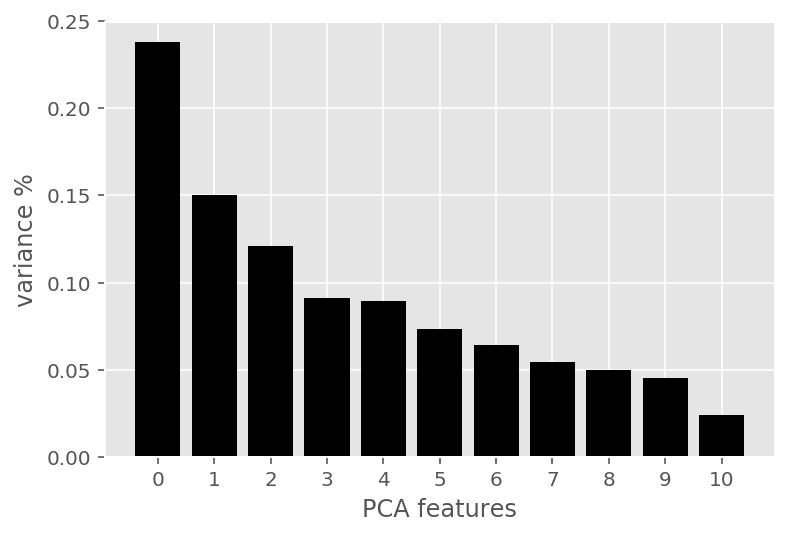

In [22]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [23]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

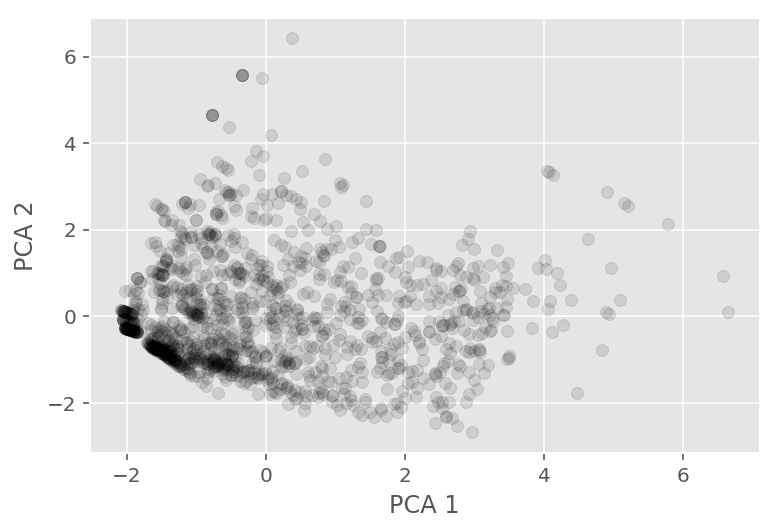

In [24]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

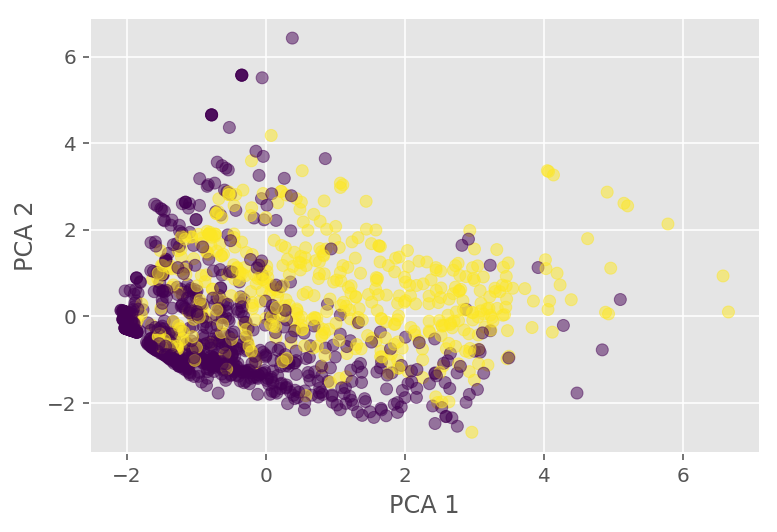

In [25]:
#Add the Y (survived or not) as colour to the data points
plt.scatter(PCA_components[0], PCA_components[1], c=Y, alpha=.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()